In [1]:
from kbmodpy import kbmod as kb
from trajectoryFiltering import *
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
def p_im(image):
    fig = plt.figure(figsize=(12,12))
    plt.imshow(image , origin='lower',  vmin=-50, vmax=100)#cmap=plt.cm.Greys_r,
    plt.xlabel('X Pixels')
    plt.ylabel('Y Pixels')
    plt.colorbar()

In [3]:
im_count = 10
p = kb.psf(1.3)

In [4]:
images = [kb.layered_image(str(n), 350, 350, 10.0, 100.0, n/10) for n in range(im_count)]

In [5]:
for i in range(im_count):
    images[i].add_object(150+3*i, 135+3.5*i, 180.0, p)

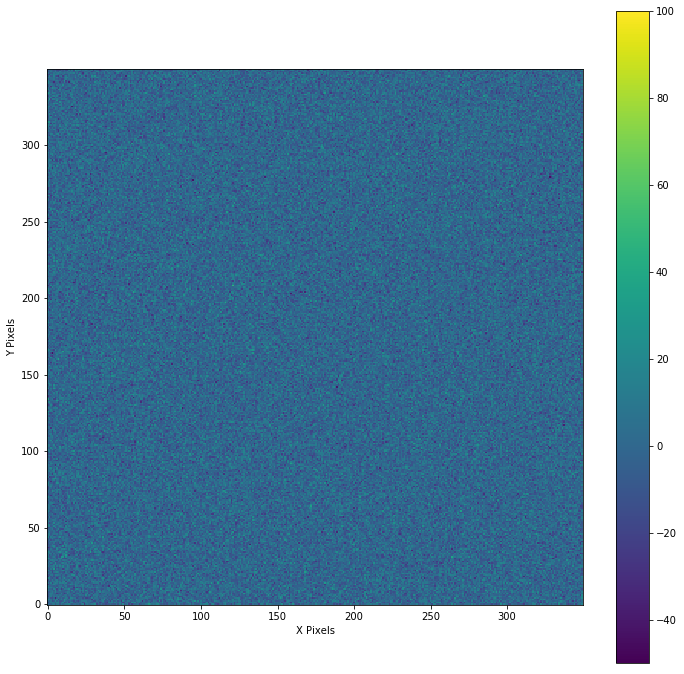

In [6]:
p_im(images[0].science())

In [7]:
stack = kb.image_stack(images)

In [8]:
search = kb.stack_search(stack, p)

In [9]:
%time
search.gpu(180, 100, 0.0, 1.0, 25.0, 50.0, 4)
search.get_results(0,20)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.58 µs


[lh: 10.089127 flux: 150.650848 x: 150 y: 136 x_v: 29.905968 y_v: 33.289570 obs_count: 10,
 lh: 10.089127 flux: 150.650848 x: 150 y: 136 x_v: 30.426653 y_v: 33.493004 obs_count: 10,
 lh: 10.089127 flux: 150.650848 x: 150 y: 136 x_v: 30.258549 y_v: 33.307961 obs_count: 10,
 lh: 10.089127 flux: 150.650848 x: 150 y: 136 x_v: 30.443127 y_v: 33.139343 obs_count: 10,
 lh: 9.770747 flux: 145.896805 x: 150 y: 137 x_v: 30.124802 y_v: 32.070179 obs_count: 10,
 lh: 9.770747 flux: 145.896805 x: 150 y: 137 x_v: 29.953638 y_v: 31.887962 obs_count: 10,
 lh: 9.770747 flux: 145.896805 x: 150 y: 137 x_v: 30.474674 y_v: 32.083588 obs_count: 10,
 lh: 9.770747 flux: 145.896805 x: 150 y: 137 x_v: 30.302502 y_v: 31.902327 obs_count: 10,
 lh: 9.689487 flux: 144.683426 x: 150 y: 135 x_v: 29.707096 y_v: 35.773430 obs_count: 10,
 lh: 9.689487 flux: 144.683426 x: 150 y: 135 x_v: 30.066160 y_v: 35.799282 obs_count: 10,
 lh: 9.689487 flux: 144.683426 x: 150 y: 135 x_v: 30.426424 y_v: 35.822239 obs_count: 10,
 lh: 9

In [10]:
%time
search.region_search(30, 35, 20, 6, 4)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.9 µs


[ix: 150 iy: 136 fx: 177 fy: 166 depth: 0 obs_count: 10 lh: 10.089128 flux 150.650848,
 ix: 150 iy: 136 fx: 178 fy: 166 depth: 0 obs_count: 10 lh: 9.856699 flux 147.180222,
 ix: 150 iy: 136 fx: 177 fy: 167 depth: 0 obs_count: 10 lh: 9.848759 flux 147.061676,
 ix: 150 iy: 135 fx: 177 fy: 167 depth: 0 obs_count: 10 lh: 9.579309 flux 143.038239,
 ix: 151 iy: 136 fx: 177 fy: 166 depth: 0 obs_count: 10 lh: 9.575986 flux 142.988617,
 ix: 150 iy: 137 fx: 177 fy: 166 depth: 0 obs_count: 10 lh: 9.533123 flux 142.348602,
 ix: 150 iy: 136 fx: 178 fy: 167 depth: 0 obs_count: 10 lh: 9.501141 flux 141.871033,
 ix: 150 iy: 135 fx: 177 fy: 166 depth: 0 obs_count: 10 lh: 9.473289 flux 141.455154,
 ix: 149 iy: 136 fx: 178 fy: 166 depth: 0 obs_count: 10 lh: 9.360481 flux 139.770706,
 ix: 150 iy: 137 fx: 177 fy: 167 depth: 0 obs_count: 10 lh: 9.357248 flux 139.722427,
 ix: 151 iy: 136 fx: 178 fy: 166 depth: 0 obs_count: 10 lh: 9.343557 flux 139.517990,
 ix: 149 iy: 136 fx: 177 fy: 166 depth: 0 obs_count: 